In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
# Death Event:

In [ ]:

df.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


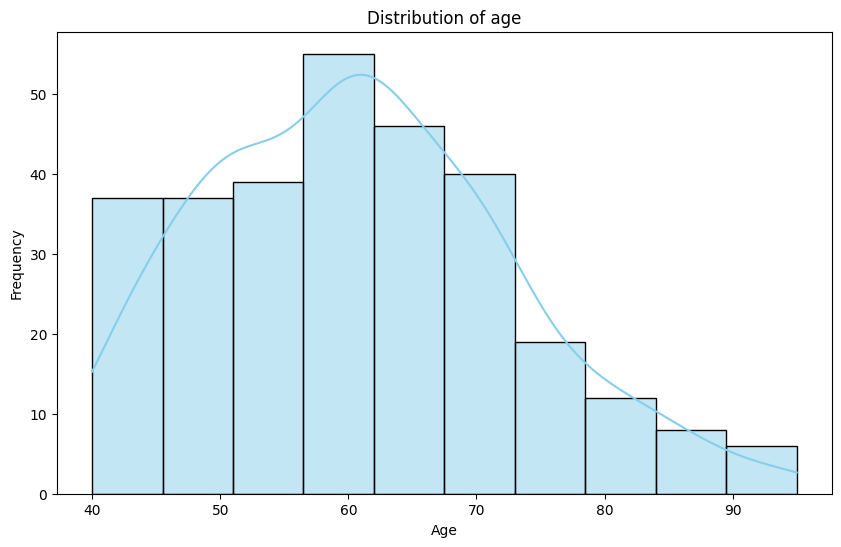

In [ ]:
# 1. What is the distribution of age among heart failure patients in the dataset?

plt.figure(figsize=(10,6))
sns.histplot(df['age'].dropna(), kde = True, color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt


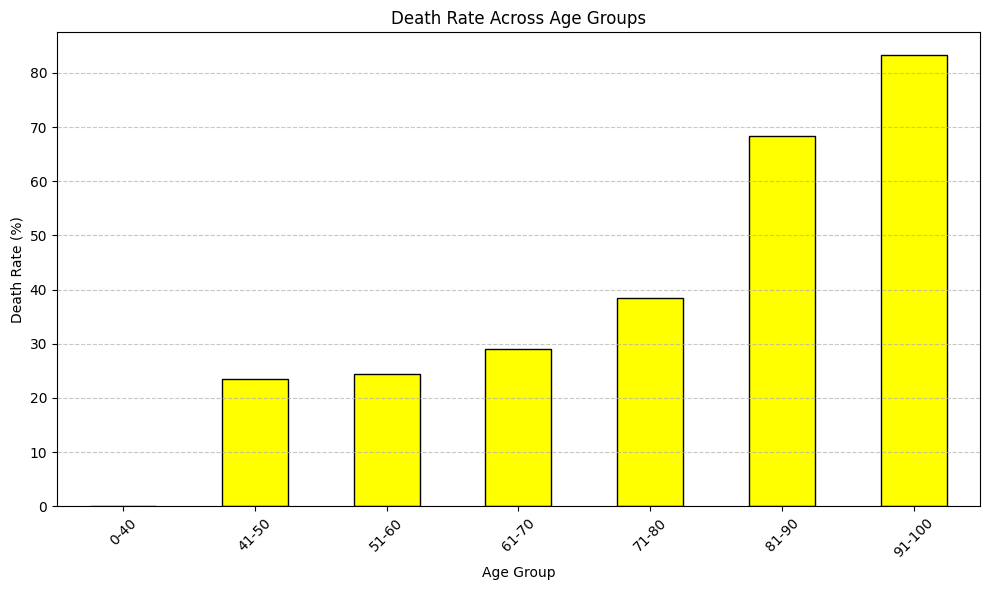

In [54]:
# 2. How does the death rate vary with age?

age_bins = [0, 40, 50, 60, 70, 80, 90, 100]

# Create labels for age bins
age_labels = ['0-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column to the DataFrame with age group labels
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate mortality rate for each age group
mortality_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100  # Convert to percentage

# Plot the mortality rate
plt.figure(figsize=(10, 6))
mortality_rate.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Death Rate Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 3. What is the percentage of male and female patients in the dataset?

<ipython-input-36-5b8b7fb89e01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=pd.cut(df['age'], bins=range(30, 100,5)), y='platelets', palette='coolwarm')


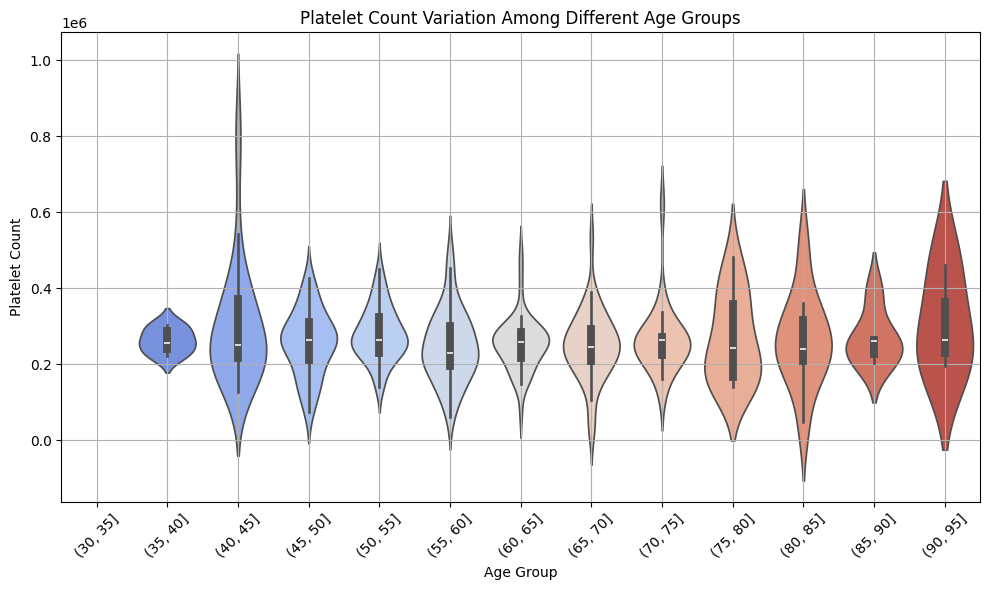

In [36]:
# 4. How does the platlet count vary among different age groups?

age_groups = df.groupby(pd.cut(df['age'], bins=range(30, 100,5)))  # Group by age ranges of 10 years

# Plot the variation of platelet count among different age groups using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x=pd.cut(df['age'], bins=range(30, 100,5)), y='platelets', palette='coolwarm')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# 5. Is there a correlaon between creatinine and sodium levels in the blood?

creatinine_levels = df['serum_creatinine']
sodium_levels = df['serum_sodium']

# Calculate the correlation coefficient
correlation = creatinine_levels.corr(sodium_levels)

print("Correlation coefficient between creatinine and sodium levels:", correlation)

Correlation coefficient between creatinine and sodium levels: -0.1890952100911741


In [40]:
# 6. How does the prevalence of high blood pressure different between male and female patients?

gender_bp_counts = df.groupby('sex')['high_blood_pressure'].value_counts(normalize=True) * 100

# Extract the prevalence of high blood pressure for male and female patients
male_bp_prevalence = gender_bp_counts['Male', 1] if ('Male', 1) in gender_bp_counts.index else 0
female_bp_prevalence = gender_bp_counts['Female', 1] if ('Female', 1) in gender_bp_counts.index else 0

print("Prevalence of high blood pressure among male patients: {:.2f}%".format(male_bp_prevalence))
print("Prevalence of high blood pressure among female patients: {:.2f}%".format(female_bp_prevalence))

Prevalence of high blood pressure among male patients: 0.00%
Prevalence of high blood pressure among female patients: 0.00%


In [42]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?


# Calculate the number of heart failure cases among smokers and non-smokers
smokers_hf_cases = df[df['smoking'] == 1]['DEATH_EVENT'].sum()
non_smokers_hf_cases = df[df['smoking'] == 0]['DEATH_EVENT'].sum()

# Calculate the total number of smokers and non-smokers
total_smokers = df['smoking'].sum()
total_non_smokers = len(df) - total_smokers

# Calculate the proportion of heart failure cases among smokers and non-smokers
smokers_hf_proportion = smokers_hf_cases / total_smokers
non_smokers_hf_proportion = non_smokers_hf_cases / total_non_smokers

# Print the results
print("Proportion of heart failure cases among smokers: {:.2%}".format(smokers_hf_proportion))
print("Proportion of heart failure cases among non-smokers: {:.2%}".format(non_smokers_hf_proportion))

Proportion of heart failure cases among smokers: 31.25%
Proportion of heart failure cases among non-smokers: 32.51%


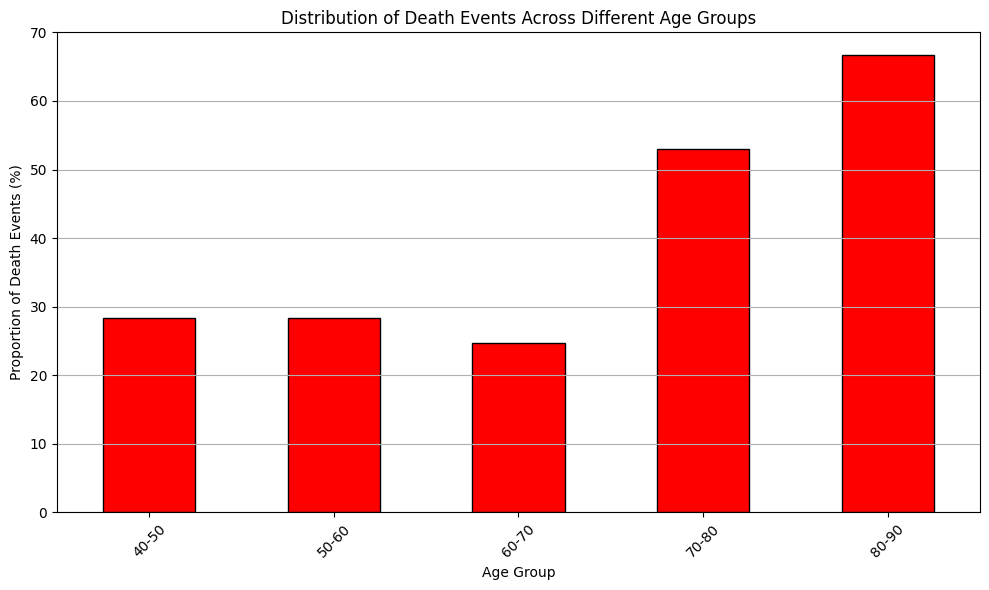

In [47]:
# 8. Are there any noticeable patterns in the distribution of death events across different age gropus?

age_groups = df.groupby(pd.cut(df['age'], bins=range(40, 100, 10)))  # Group by age ranges of 10 years
death_event_proportion_by_age = age_groups['DEATH_EVENT'].mean() * 100  # Calculate the proportion of death events as a percentage

# Plot the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
death_event_proportion_by_age.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Death Events (%)')
plt.xticks(range(len(death_event_proportion_by_age)), [f'{i.left}-{i.right}' for i in death_event_proportion_by_age.index], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import ttest_ind

In [51]:
# 9 . Is there any significant difference in ejection fraction between patients with and without diabetes?

ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform a t-test
t_statistic, p_value = ttest_ind(ef_diabetes, ef_no_diabetes)

# Define the significance level
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")

T-Statistic: -0.08358970647234736
P-Value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


Summary Statistics:
Mean serum creatinine level for patients who survived: 1.1848768472906404
Mean serum creatinine level for patients who did not survive: 1.8358333333333334
Median serum creatinine level for patients who survived: 1.0
Median serum creatinine level for patients who did not survive: 1.3


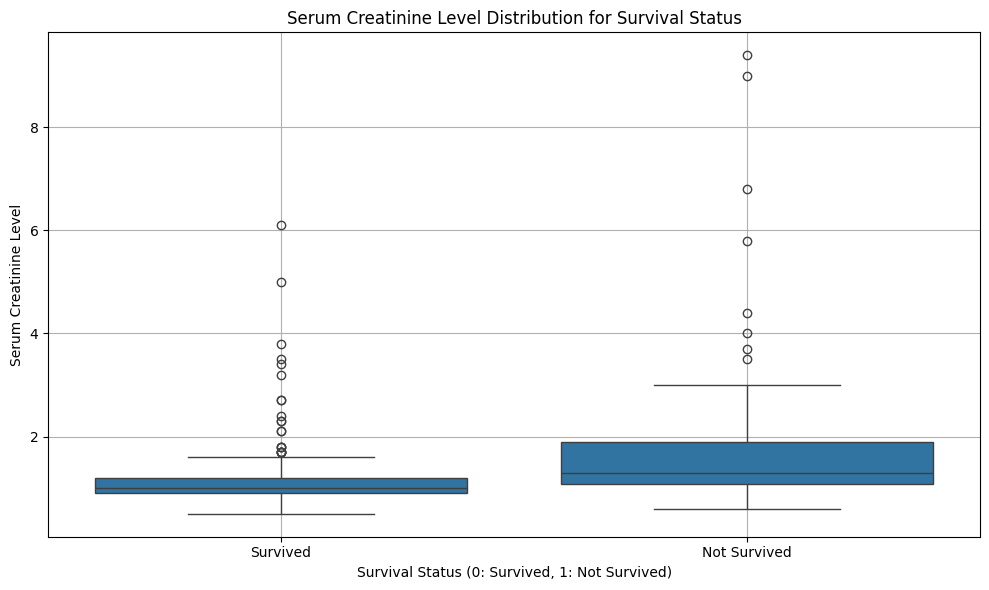

In [49]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not?

creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Calculate summary statistics
mean_survived = creatinine_survived.mean()
mean_not_survived = creatinine_not_survived.mean()
median_survived = creatinine_survived.median()
median_not_survived = creatinine_not_survived.median()

print("Summary Statistics:")
print("Mean serum creatinine level for patients who survived:", mean_survived)
print("Mean serum creatinine level for patients who did not survive:", mean_not_survived)
print("Median serum creatinine level for patients who survived:", median_survived)
print("Median serum creatinine level for patients who did not survive:", median_not_survived)

# Create box plots to visualize the distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Level Distribution for Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.grid(True)
plt.tight_layout()
plt.show()